In [1]:
import numpy as np
from uncertainties import ufloat
from fticr_toolkit import ame
from matplotlib import pyplot as plt

m172 = ufloat(*ame.get_iso_mass(172, "Yb"))
print(m172, m172.s/m172.n)
m170 = ufloat(*ame.get_iso_mass(170, "Yb"))
print(m170, m170.s/m170.n)

171.936386654+/-0.000000014 8.14254636406499e-11
169.934767242+/-0.000000011 6.47307209615038e-11


In [2]:
def reducedmass1(m1, m2):
    return (1/m1-1/m2)

def reducedmass2(R, m1): # R=m1/m2
    return (1-R)/m1

def reducedmass3(m1, m2):
    return (m2-m1)/(m1*m2)

print(reducedmass1(m172, m170))
print(reducedmass2(m172/m170, m172))
print(reducedmass3(m172, m170))
red = reducedmass3(m172, m170)
print(red.s/red.n)

(-6.85064507+/-0.00000006)e-05
(-6.85064507+/-0.00000006)e-05
(-6.85064507+/-0.00000006)e-05
-8.871587520016865e-09


In [3]:
isotopes = [168, 170, 174, 176]
ref = 172

In [4]:
def reducedmass_ions(a1, a2, q):
    m1 = ufloat(*ame.get_ion_mass(str(a1)+"Yb"+str(q)+"+"))
    m2 = ufloat(*ame.get_ion_mass(str(a2)+"Yb"+str(q)+"+"))
    return reducedmass1(m1, m2)

In [5]:
print(reducedmass_ions(170, 172, 0)*1e6)
print(reducedmass_ions(170, 172, 1)*1e6)


68.5064507+/-0.0000006
68.5068905+/-0.0000006


In [6]:


mus= []
dmus= []

qs = range(0, 71)
#print(qs[-1])
for q in qs:
    submu = []
    subdmu = []
    for iso in isotopes:
        red = reducedmass_ions(iso, ref, q)
        submu.append(red.n)
        subdmu.append(red.s)
    
    mus.append(submu)
    dmus.append(subdmu)

mus = np.asarray(mus)
dmus = np.asarray(dmus)
#print(qs)
#print(mus[:,0])


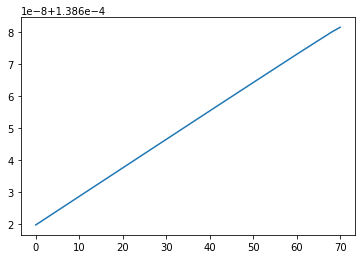

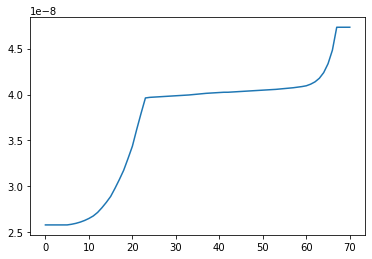

In [7]:
plt.errorbar(qs, mus[:,0], yerr=dmus[:,0])
plt.show()

plt.plot(qs, dmus[:,0]/mus[:,0])
plt.show()

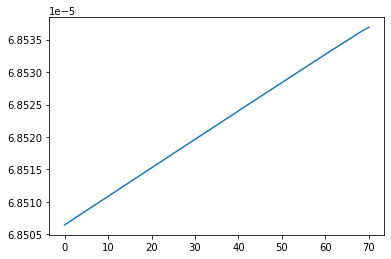

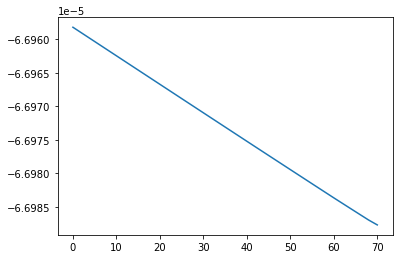

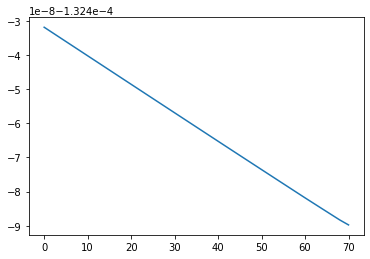

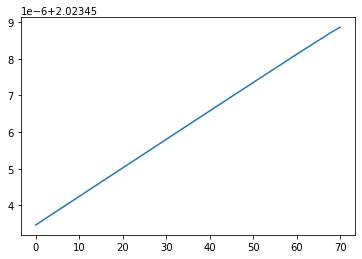

In [8]:

plt.plot(qs, mus[:,1])
plt.show()
plt.plot(qs, mus[:,2])
plt.show()
plt.plot(qs, mus[:,3])
plt.show()

r = mus[:,0]/mus[:,1]

plt.plot(qs, r)
plt.show()

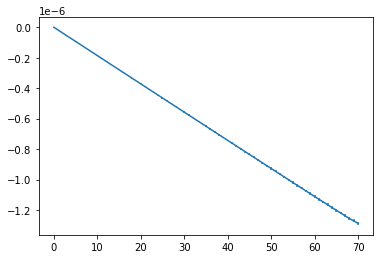

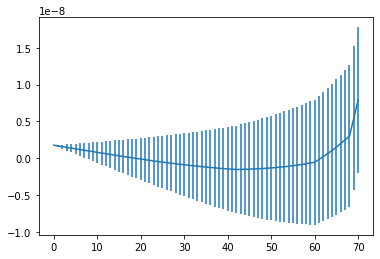

In [20]:
ms = []
dms = []

for q in qs:
    #print(q)
    #plt.plot(isotopes, mus[q])
    #plt.show()
    popt, pcov = np.polyfit(isotopes, mus[q]/mus[0], 1, cov=True)
    perr = np.sqrt(np.diag(pcov))
    ms.append(popt[0])
    dms.append(perr[0])

ms = np.asarray(ms)
    
plt.errorbar(qs, ms, dms)
plt.show()
popt, pcov = np.polyfit(qs, ms, 1, cov=True)
fit = np.polyval(popt, qs)
plt.errorbar(qs, ms-fit, dms)
plt.show()

In [16]:
def inverse_reducedmass_nucleous(a1, a2, q):
    _, _, data1 = ame.get_ion_mass(str(a1)+"Yb"+str(q)+"+", full=True)
    m1n = data1["mneutral"]
    qe1 = data1["qe_amu"]
    b1 = data1["total_binding_amu"]
    _, _, data2 = ame.get_ion_mass(str(a2)+"Yb"+str(q)+"+", full=True)
    m2n = data2["mneutral"]
    qe2 = data2["qe_amu"]
    b2 = data2["total_binding_amu"]
    
    bdiff = b2-b1
    mneutraldiff = m2n - m1n
    print("neutral mass diff, binding diff", mneutraldiff, bdiff)
    denominator = mneutraldiff + bdiff
    print("denominator", denominator)
    
    print("nominator terms: m2m1, -m2qme, m2b1")
    print(m1n*m2n, (m1n*m2n).s/(m1n*m2n).n)
    print(-qe1*m2n)
    print(b1*m2n)
    print("nominator terms: -m1qme, qmeqme, -b1*qe2")
    print(-m1n*qe2)
    print(qe1*qe2)
    print(-b1*qe2)
    print("nominator terms: m1n*b2, -qe1*b2, b1*b2")
    print(m1n*b2)
    print(-qe1*b2)
    print(b1*b2)
    
    nominator = m1n*m2n -qe1*m2n + b1*m2n -m1n*qe2 + qe1*qe2 -b1*qe2 +m1n*b2 -qe1*b2 + b1*b2
    alt_nominator = data1["mion_amu"]*data2["mion_amu"]
    print("nominator")
    print(nominator)
    print(alt_nominator, nominator.n-alt_nominator.n)
    
    print("nominator terms: m2m1, -m2qme, m2b1")
    print(m1n*m2n/nominator.n)
    print(-qe1*m2n/nominator.n)
    print(b1*m2n/nominator.n)
    print("nominator terms: -m1qme, qmeqme, -b1*qe2")
    print(-m1n*qe2/nominator.n)
    print(qe1*qe2/nominator.n)
    print(-b1*qe2/nominator.n)
    print("nominator terms: m1n*b2, -qe1*b2, b1*b2")
    print(m1n*b2/nominator.n)
    print(-qe1*b2/nominator.n)
    print(b1*b2/nominator.n)
    
inverse_reducedmass_nucleous(170, 172, 42)
    

neutral mass diff, binding diff 2.001619412+/-0.000000018 (0.0+/-1.2)e-07
denominator 2.00161941+/-0.00000012
nominator terms: m2m1, -m2qme, m2b1
29217.9698465+/-0.0000030 1.0402005751436049e-10
-3.96147558894+/-0.00000000034
0.005858+/-0.000015
nominator terms: -m1qme, qmeqme, -b1*qe2
-3.91535756475+/-0.00000000028
0.000530858012935+/-0.000000000000031
(-7.850+/-0.020)e-07
nominator terms: m1n*b2, -qe1*b2, b1*b2
0.005790+/-0.000015
(-7.850+/-0.020)e-07
(1.161+/-0.004)e-09
nominator
29210.105190+/-0.000021
29210.1051898+/-0.0000030 -3.637978807091713e-12
nominator terms: m2m1, -m2qme, m2b1
1.00026924438+/-0.00000000010
-0.000135620038449+/-0.000000000000012
(2.005+/-0.005)e-07
nominator terms: -m1qme, qmeqme, -b1*qe2
-0.000134041200444+/-0.000000000000010
(1.81737795699+/-0.00000000011)e-08
(-2.687+/-0.007)e-11
nominator terms: m1n*b2, -qe1*b2, b1*b2
(1.982+/-0.005)e-07
(-2.687+/-0.007)e-11
(3.974+/-0.014)e-14
